In [1]:
import nltk
import numpy as np
import collections
DEMENTIA_PATH = "../data/dementia.txt"
CONTROL_PATH = "../data/control_51.txt"
OPERA_PATH = "../data/train/cut_4_train.txt"

In [2]:
with open(OPERA_PATH, encoding='utf8') as f:
    sentence = []
    for line in f:
        sentence.append('<s>')
        for token in line.split():
            sentence.append(token)
        sentence.append('</s>')

In [3]:
print("Total token size of opera: {}".format(len(sentence)))

Total token size of opera: 3823598


In [4]:
def perplexity(num_list):
    ret = 0.0
    for num in num_list:
        ret += np.log2(num)
    ret /= len(num_list)
#     ret = ret ** (-1/len(num_list))
    return ret

In [5]:
unigram = collections.Counter(sentence)
bigram = list(nltk.bigrams(sentence))
bigram_count = collections.Counter(bigram)

In [6]:
bigram_prob = []
for i in bigram:
    bigram_prob.append(bigram_count[i]/unigram[i[0]])

In [7]:
# read dementia and control dialogue data
dialogue_dict = {}
with open(DEMENTIA_PATH, encoding='utf8') as f:
    dialogue_corpus = f.readlines()
f.close()
for i in range(len(dialogue_corpus)):
    if i % 2 == 0:
        dialogue_dict[dialogue_corpus[i].strip('\n')] = dialogue_corpus[i+1].strip('\n')
with open(CONTROL_PATH, encoding='utf8') as f:
    dialogue_corpus = f.readlines()
f.close()
for i in range(len(dialogue_corpus)):
    if i % 2 == 0:
        dialogue_dict[dialogue_corpus[i].strip('\n')] = dialogue_corpus[i+1].strip('\n')
print("Size of control & dementia corpus: {}".format(len(dialogue_dict)))

Size of control & dementia corpus: 102


In [8]:
import jieba
jieba.set_dictionary('../data/dict.txt.big')
dialogue_seg = []
for key, sent in dialogue_dict.items():
    sent_seg = jieba.lcut(sent)
    sent_seg.insert(0,'<s>')
    sent_seg.append('</s>')
    dialogue_seg.append(sent_seg)


Building prefix dict from /home/yyliu/PycharmProjects/NLP/data/dict.txt.big ...
Loading model from cache /tmp/jieba.ue770738bdb792356a45fd97be467a134.cache
Loading model cost 1.155 seconds.
Prefix dict has been built succesfully.


In [9]:
dialogue_token = []
for i in dialogue_seg:
    dialogue_token.append(len(i))
print(dialogue_token)

[163, 22, 25, 68, 67, 22, 40, 147, 122, 36, 55, 27, 63, 43, 39, 40, 39, 92, 42, 30, 43, 61, 15, 73, 25, 70, 70, 63, 79, 54, 49, 56, 42, 70, 50, 63, 24, 42, 17, 80, 49, 66, 53, 23, 79, 75, 74, 41, 55, 43, 59, 39, 33, 105, 28, 56, 54, 35, 36, 39, 71, 35, 59, 141, 96, 77, 67, 23, 117, 66, 56, 34, 71, 36, 35, 89, 152, 44, 65, 218, 71, 68, 47, 58, 46, 60, 90, 37, 62, 40, 108, 72, 35, 23, 62, 108, 52, 80, 66, 42, 24, 60]


In [10]:
# dialogue_token = []
# for key, sent in dialogue_dict.items():
#     dialogue_token.append(len(sent))
# print(dialogue_token)

In [11]:
# len(dialogue_seg)
perplexity_dialogue = []
for i in dialogue_seg:
    bigram_dialogue = list(nltk.bigrams(i))
    
    test_prob = []
    for j in bigram_dialogue:
        test_prob.append((bigram_count[j]+1) / (unigram[j[0]]+len(unigram)))
#     print(test_prob)
    perplexity_dialogue.append(perplexity(test_prob))
    test_prob.clear()
    bigram_dialogue.clear()

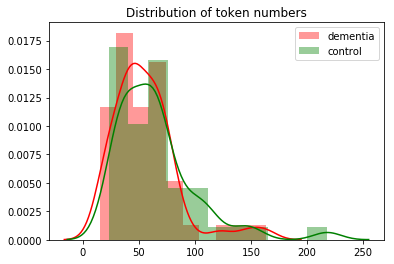

In [12]:
dialogue_token_dementia = np.asarray(dialogue_token[:52])
dialogue_token_control = np.asarray(dialogue_token[52:])

import matplotlib.pyplot as plt
import seaborn
seaborn.distplot(dialogue_token_dementia, color='r', label='dementia')
seaborn.distplot(dialogue_token_control, color='g', label='control')
plt.title('Distribution of token numbers')
plt.legend()
plt.show()

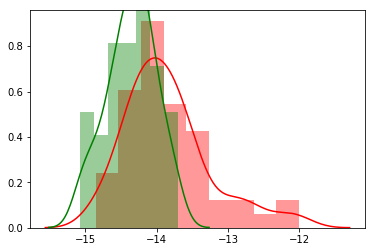

In [13]:
perplexity_dialogue_dementia = np.asarray(perplexity_dialogue[:52])
perplexity_dialogue_control = np.asarray(perplexity_dialogue[52:])
seaborn.distplot(perplexity_dialogue_dementia, color='r')
seaborn.distplot(perplexity_dialogue_control, color='g')
plt.show()


In [14]:
# bigram_test = list(nltk.bigrams(test_sentence_seg))
# test_prob = []
# for i in bigram_test:
#     test_prob.append((bigram_count[i]+1) / (unigram[i[0]]+len(unigram)))
# print(perplexity(test_prob))

In [15]:
import postag_ver004

In [17]:
my_cluster = postag_ver004.Cluster()

Read file success...
Syntactic features extract success...


In [57]:
n_list = [r[0] for r in my_cluster.syntactic_feature]
v_list = [r[1] for r in my_cluster.syntactic_feature]
a_list = [r[2] for r in my_cluster.syntactic_feature]
pronoun_list = [r[3] for r in my_cluster.syntactic_feature]
ttr_list = [r[4] for r in my_cluster.syntactic_feature]